In [1]:
from comp_features import generate_features
import pandas as pd
from train_model import train_kmeans, plot_market_regime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 你的 API Key
API_KEY = "ab746526067b62ac85bcf51ef80eae5a"

# 选择资产
ASSET = "SPX"

# 读取数据
# df = pd.read_excel(f"/Users/charlesxiong/Desktop/IBKR_algo/ode/data/{ASSET}/{ASSET}.xlsx")
df = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/SPX/hist_data.xlsx')
df_pc = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/spxpc.xlsx')
df_gdp = pd.read_excel('/Users/charlesxiong/Downloads/GDP_PC1.xlsx', sheet_name='GDP')
df_pmi = pd.read_excel('/Users/charlesxiong/Downloads/GDP_PC1.xlsx', sheet_name='PMI')
df_pc['DateTime'] = pd.to_datetime(df_pc['DateTime'])
# df = pd.read_excel('/Users/charlesxiong/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/2998da376bfc9a18a50b280a15262ed2/Message/MessageTemp/7d7949e6fbb30129561ad6cd1cf7a4b2/File/SPX(1).xlsx')
# df_news = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/df_news.xlsx')
# df_news['News Sentiment_ewa_diff'] = df_news['News Sentiment_ewa'].diff(5)

# 计算所有特征
df_features = generate_features(df, ASSET, API_KEY)

df_bond = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/BBG AGG BOND/BBG AGG BOND.xlsx')[['DateTime', 'BBG AGG BOND']]
df_features = pd.merge(df_features, df_bond, on='DateTime', how='left')
df_features = pd.merge(df_features, df_gdp[['DateTime','GDP']], on='DateTime', how='left')
df_features = pd.merge(df_features, df_pmi[['DateTime','PMI']], on='DateTime', how='left')




# news = ['News Sentiment_ewa_mean_ret_5d',
#  'News Sentiment_ewa_mean_ret_21d',
#        'News Sentiment_ewa_mean_ret_10d']

# news = ['News Sentiment_ewa_diff']


# 保存结果
# df_features = pd.merge(df_features, df_news[news+['DateTime']], on='DateTime', how='left')





In [3]:
df_features['Corr'] = df_features['SPX'].rolling(window=252, min_periods=150).corr(df_features['BBG AGG BOND'])
df_features['Market_Regime_Num_Train'] = 0


# df_features['SPX_Put_Call_Ratio_ewa_10'] = df_features['SPX Put/Call Ratio'].ewm(halflife=10, adjust=False).mean()
# df_features['SPX_Put_Call_Ratio_ewa_5'] = df_features['SPX Put/Call Ratio'].ewm(halflife=5, adjust=False).mean()
# df_features['SPX_Put_Call_Ratio_ewa_21'] = df_features['SPX Put/Call Ratio'].ewm(halflife=21, adjust=False).mean()

df_features['GDP'].fillna(method='ffill', inplace=True)
df_features['PMI'].fillna(method='ffill', inplace=True)


df_features

,DateTime,SPX,VIX,SPX_returns,SPX_mean_ret_5d,SPX_mean_ret_10d,SPX_mean_ret_21d,SPX_mean_ret_120d,SPX_downside_std_5d,SPX_downside_std_10d,...,SPX_sortino_21d,SPX_sortino_120d,T10Y2Y_EWMA_10,DGS2_diff_EWMA_21,VIX_EWMA_63,BBG AGG BOND,GDP,PMI,Corr,Market_Regime_Num_Train
0,1990-02-28,331.89,21.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.102264,0.001311,21.990000,393.75,NaN,NaN,NaN,0
1,1990-03-01,332.74,21.90,0.002558,0.002558,0.002558,0.002558,0.002558,NaN,NaN,...,NaN,NaN,0.099433,0.004516,21.989015,392.47,NaN,NaN,NaN,0
2,1990-03-02,335.54,21.34,0.008380,0.003311,0.002948,0.002747,0.002591,NaN,NaN,...,NaN,NaN,0.096793,0.002746,21.981914,393.29,NaN,NaN,NaN,0
3,1990-03-05,333.74,22.03,-0.005379,0.002186,0.002390,0.002483,0.002545,NaN,NaN,...,NaN,NaN,0.097007,0.004929,21.982440,391.64,NaN,NaN,NaN,0
4,1990-03-06,337.93,20.55,0.012477,0.003519,0.003066,0.002807,0.002603,NaN,NaN,...,NaN,NaN,0.093860,0.004444,21.966766,392.74,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,2025-02-24,5983.25,18.98,-0.004982,-0.001959,-0.000715,-0.000052,0.000631,0.005665,0.005956,...,-0.008362,0.085056,0.268421,-0.004470,16.497931,2225.05,5.04258,50.9,0.681345,0
8812,2025-02-25,5955.25,19.43,-0.004691,-0.002312,-0.000981,-0.000203,0.000600,0.005323,0.005773,...,-0.033073,0.081132,0.265848,-0.006273,16.530014,2238.28,5.04258,50.9,0.680341,0
8813,2025-02-26,5956.06,19.10,0.000136,-0.001995,-0.000907,-0.000192,0.000597,0.005323,0.005773,...,-0.031279,0.080771,0.261438,-0.006719,16.558135,2243.11,5.04258,50.9,0.679777,0
8814,2025-02-27,5861.57,21.13,-0.015992,-0.003807,-0.001917,-0.000705,0.000502,0.006054,0.006097,...,-0.112410,0.067758,0.258663,-0.005851,16.608161,2240.16,5.04258,50.9,0.678231,0


In [4]:
# 选择特征和目标
feature_columns = [
    f"{ASSET}_mean_ret_5d", f"{ASSET}_mean_ret_21d", f"{ASSET}_mean_ret_10d", f"{ASSET}_mean_ret_120d", 
    f"{ASSET}_downside_std_5d", f"{ASSET}_downside_std_21d",
    f"{ASSET}_sortino_5d", f"{ASSET}_sortino_21d", f"{ASSET}_sortino_10d"
]

feature_columns_xgb = feature_columns + [            
    "T10Y2Y_EWMA_10", "DGS2_diff_EWMA_21", "VIX_EWMA_63", "Corr", "GDP", "PMI"]


df_result = df_features.copy()
df_result

,DateTime,SPX,VIX,SPX_returns,SPX_mean_ret_5d,SPX_mean_ret_10d,SPX_mean_ret_21d,SPX_mean_ret_120d,SPX_downside_std_5d,SPX_downside_std_10d,...,SPX_sortino_21d,SPX_sortino_120d,T10Y2Y_EWMA_10,DGS2_diff_EWMA_21,VIX_EWMA_63,BBG AGG BOND,GDP,PMI,Corr,Market_Regime_Num_Train
0,1990-02-28,331.89,21.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.102264,0.001311,21.990000,393.75,NaN,NaN,NaN,0
1,1990-03-01,332.74,21.90,0.002558,0.002558,0.002558,0.002558,0.002558,NaN,NaN,...,NaN,NaN,0.099433,0.004516,21.989015,392.47,NaN,NaN,NaN,0
2,1990-03-02,335.54,21.34,0.008380,0.003311,0.002948,0.002747,0.002591,NaN,NaN,...,NaN,NaN,0.096793,0.002746,21.981914,393.29,NaN,NaN,NaN,0
3,1990-03-05,333.74,22.03,-0.005379,0.002186,0.002390,0.002483,0.002545,NaN,NaN,...,NaN,NaN,0.097007,0.004929,21.982440,391.64,NaN,NaN,NaN,0
4,1990-03-06,337.93,20.55,0.012477,0.003519,0.003066,0.002807,0.002603,NaN,NaN,...,NaN,NaN,0.093860,0.004444,21.966766,392.74,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,2025-02-24,5983.25,18.98,-0.004982,-0.001959,-0.000715,-0.000052,0.000631,0.005665,0.005956,...,-0.008362,0.085056,0.268421,-0.004470,16.497931,2225.05,5.04258,50.9,0.681345,0
8812,2025-02-25,5955.25,19.43,-0.004691,-0.002312,-0.000981,-0.000203,0.000600,0.005323,0.005773,...,-0.033073,0.081132,0.265848,-0.006273,16.530014,2238.28,5.04258,50.9,0.680341,0
8813,2025-02-26,5956.06,19.10,0.000136,-0.001995,-0.000907,-0.000192,0.000597,0.005323,0.005773,...,-0.031279,0.080771,0.261438,-0.006719,16.558135,2243.11,5.04258,50.9,0.679777,0
8814,2025-02-27,5861.57,21.13,-0.015992,-0.003807,-0.001917,-0.000705,0.000502,0.006054,0.006097,...,-0.112410,0.067758,0.258663,-0.005851,16.608161,2240.16,5.04258,50.9,0.678231,0


✅ Processing: 1993-01-01 to 2008-01-01
✅ Final chosen penalty: 19, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.35361905074566735}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:48:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


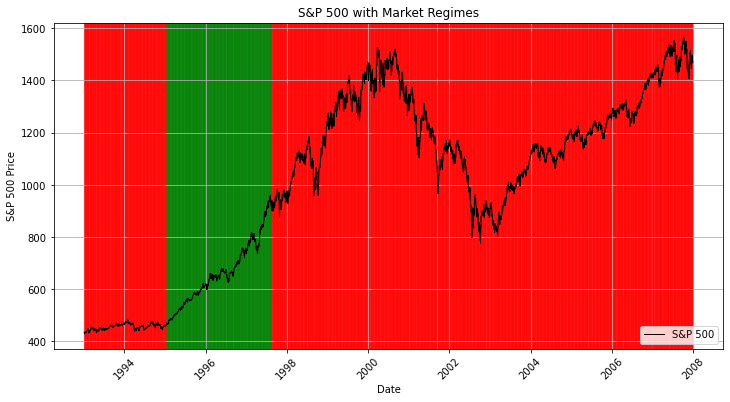

✅ Processing: 1993-07-01 to 2008-07-01
✅ Final chosen penalty: 7, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.05, 'strat_returns': 0.28146430328174477}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:49:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


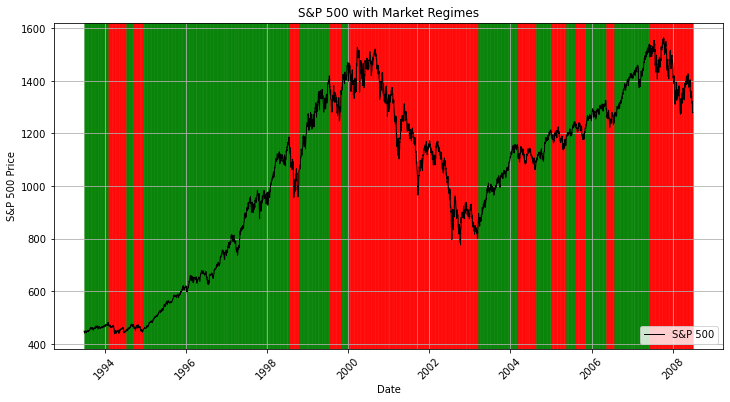

✅ Processing: 1994-01-01 to 2009-01-01
✅ Final chosen penalty: 8, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.24740385273064436}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:49:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


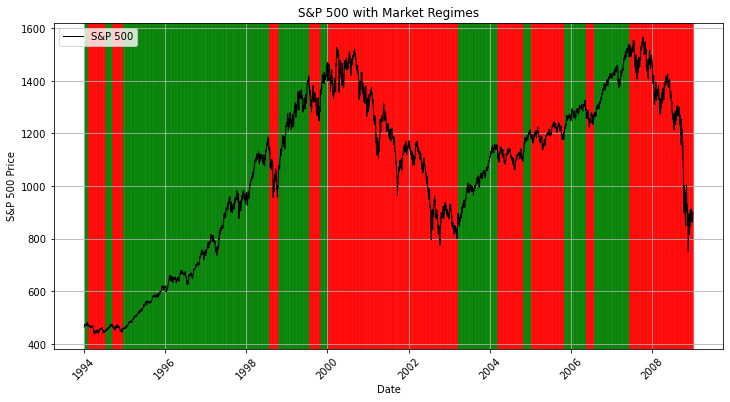

✅ Processing: 1994-07-01 to 2009-07-01
✅ Final chosen penalty: 5, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 15, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.43252145129037123}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:50:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


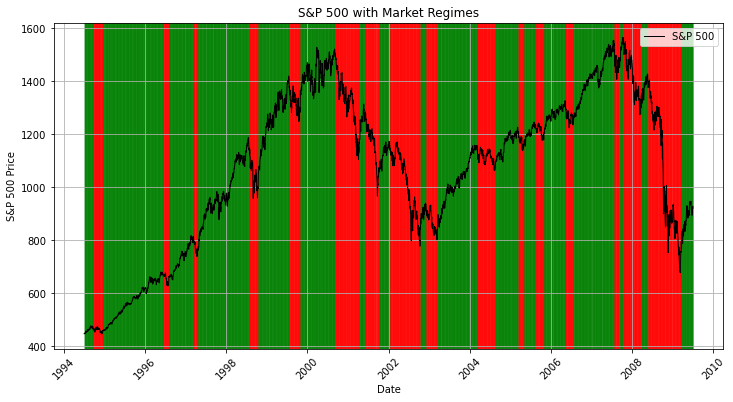

✅ Processing: 1995-01-01 to 2010-01-01
✅ Final chosen penalty: 3, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.5174771167472081}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:50:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


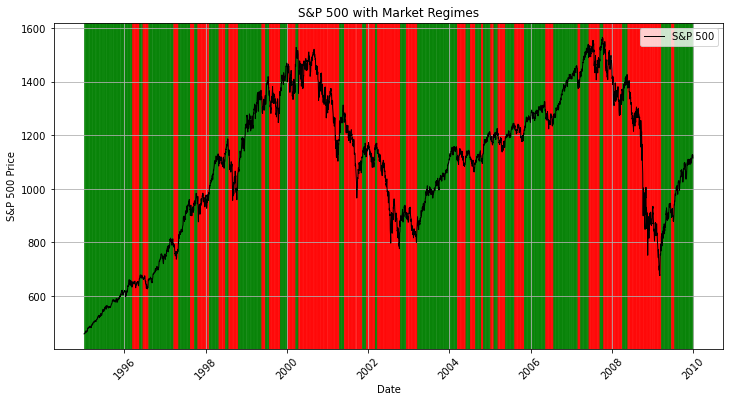

✅ Processing: 1995-07-01 to 2010-07-01
✅ Final chosen penalty: 10, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.4364182027317549}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


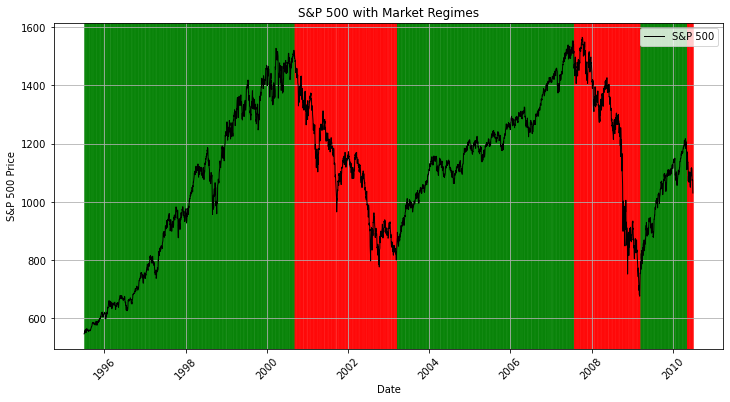

✅ Processing: 1996-01-01 to 2011-01-01
✅ Final chosen penalty: 6, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.3744456141522676}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


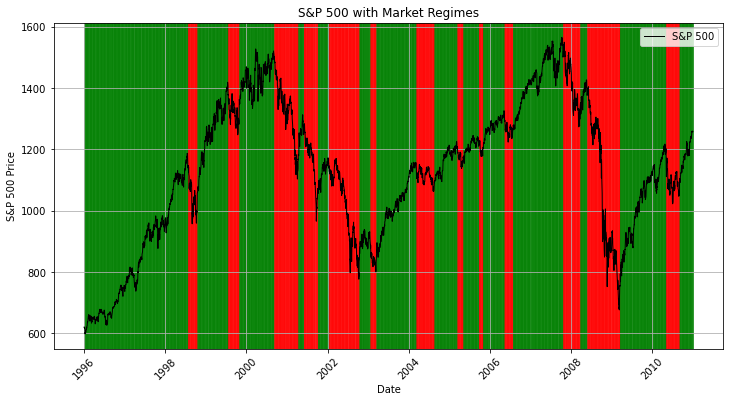

✅ Processing: 1996-07-01 to 2011-07-01
✅ Final chosen penalty: 7, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 25, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.2822350730790879}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:52:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


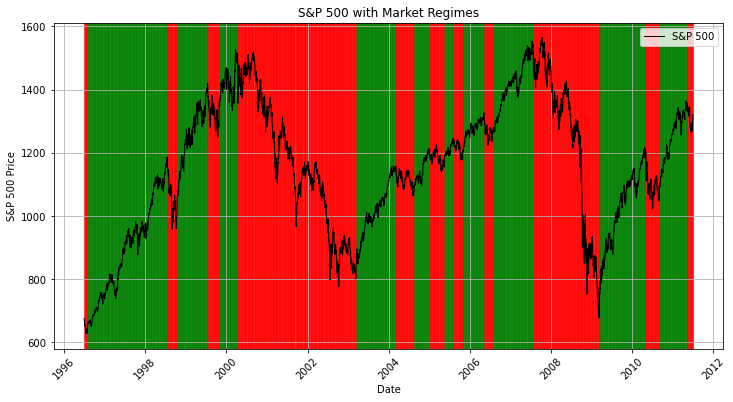

✅ Processing: 1997-01-01 to 2012-01-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.2674083120406878}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:52:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


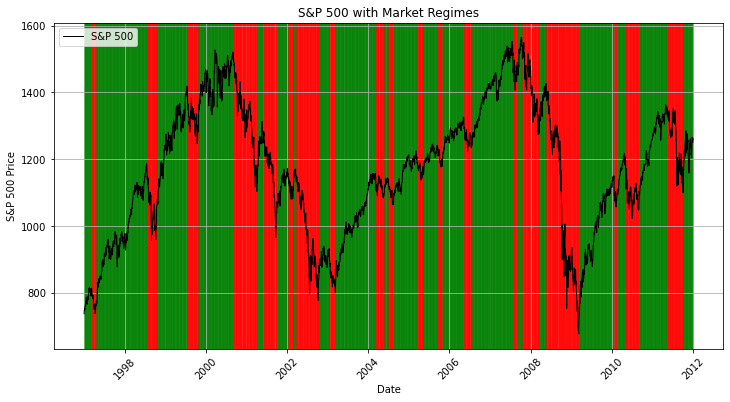

✅ Processing: 1997-07-01 to 2012-07-01
✅ Final chosen penalty: 3, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 35, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.39348770290214796}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


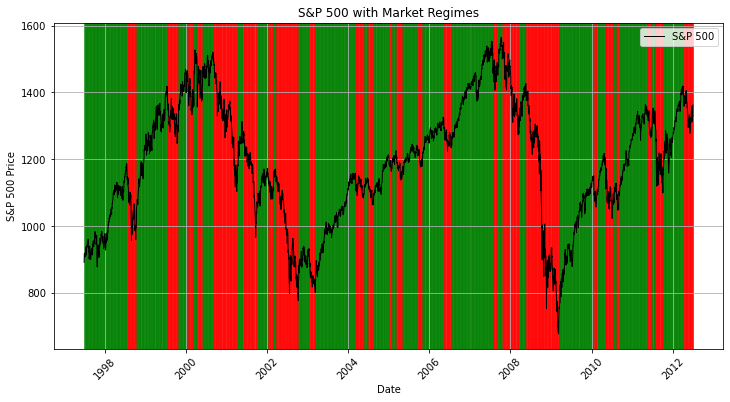

✅ Processing: 1998-01-01 to 2013-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 35, 'learning_rate': 0.05, 'strat_returns': 0.7140915707271867}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


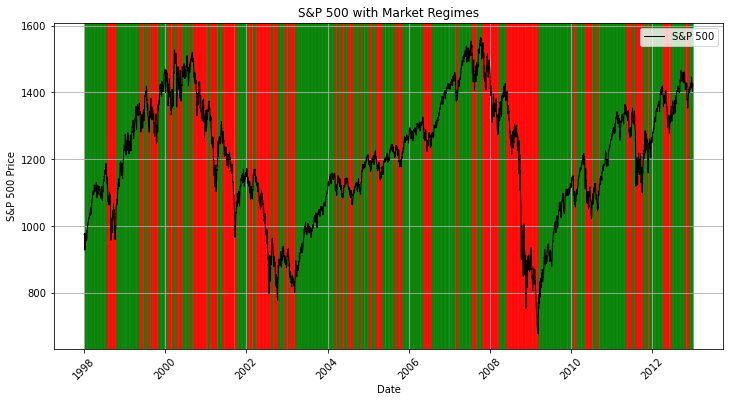

✅ Processing: 1998-07-01 to 2013-07-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.4102099621465949}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:53:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


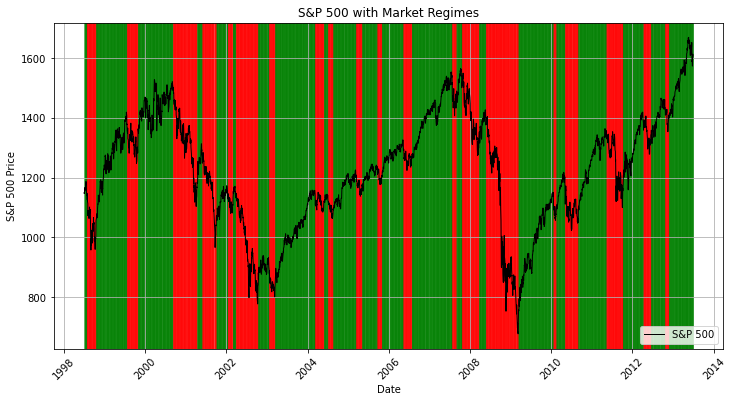

✅ Processing: 1999-01-01 to 2014-01-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.6002255937206593}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:54:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


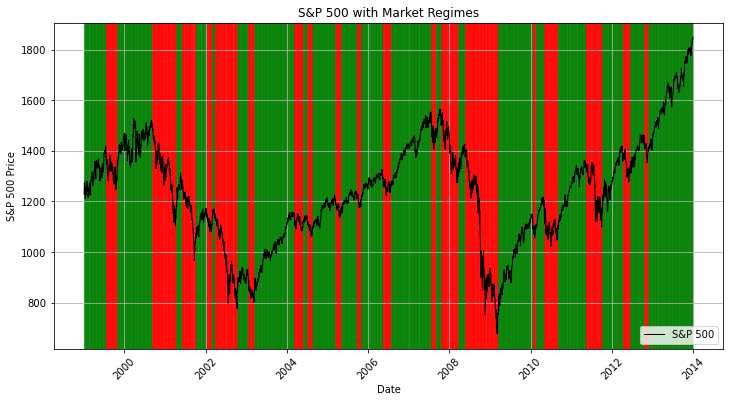

✅ Processing: 1999-07-01 to 2014-07-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.6061854113444709}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


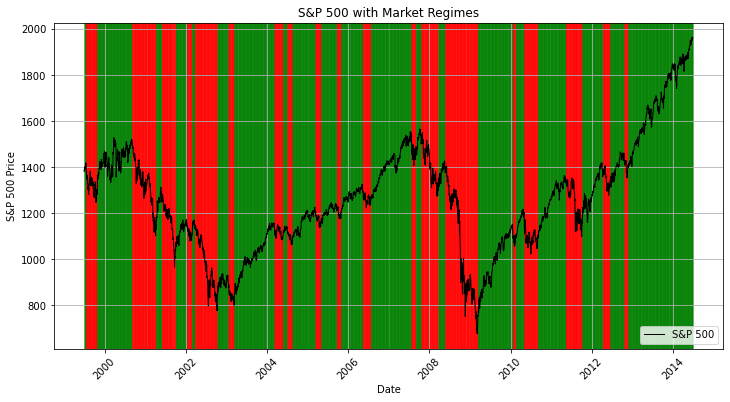

✅ Processing: 2000-01-01 to 2015-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.559733078792412}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:55:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


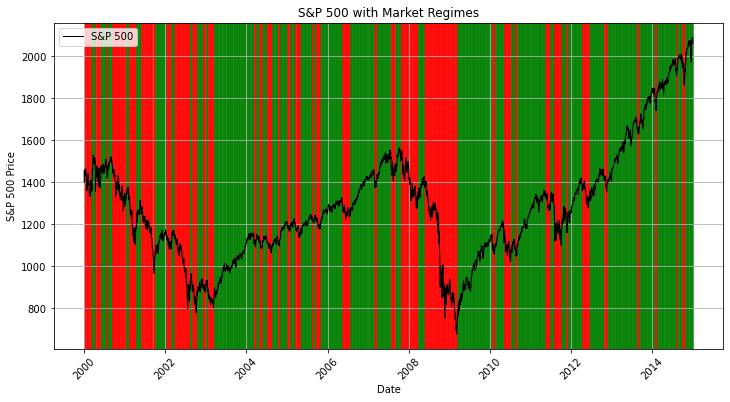

✅ Processing: 2000-07-01 to 2015-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.4146742678531701}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:55:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


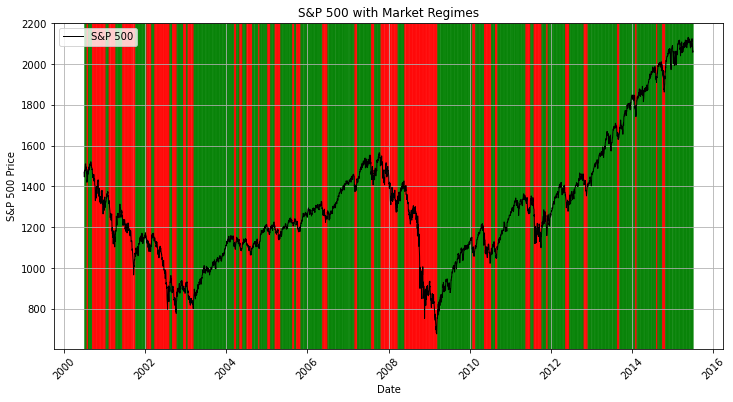

✅ Processing: 2001-01-01 to 2016-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 35, 'learning_rate': 0.05, 'strat_returns': 0.5943511092470455}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:55:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


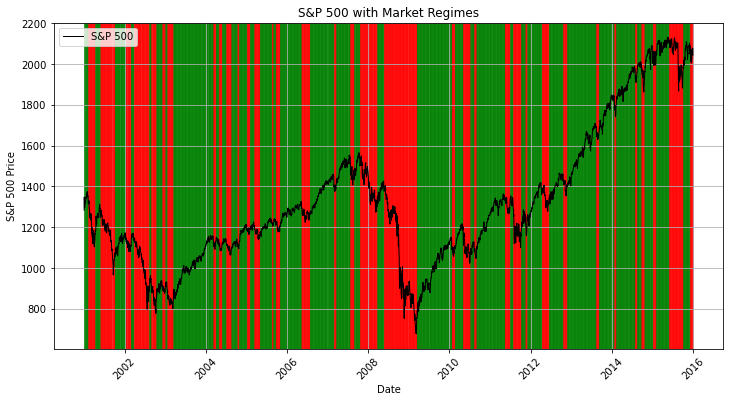

✅ Processing: 2001-07-01 to 2016-07-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.3000862705497982}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:56:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


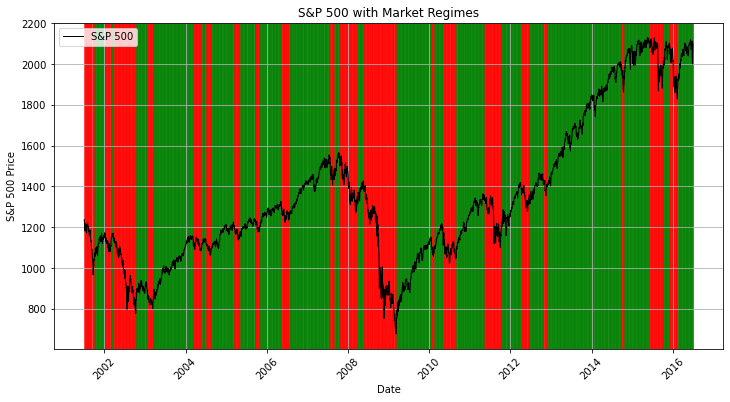

✅ Processing: 2002-01-01 to 2017-01-01
✅ Final chosen penalty: 7, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.5226146077610154}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:56:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


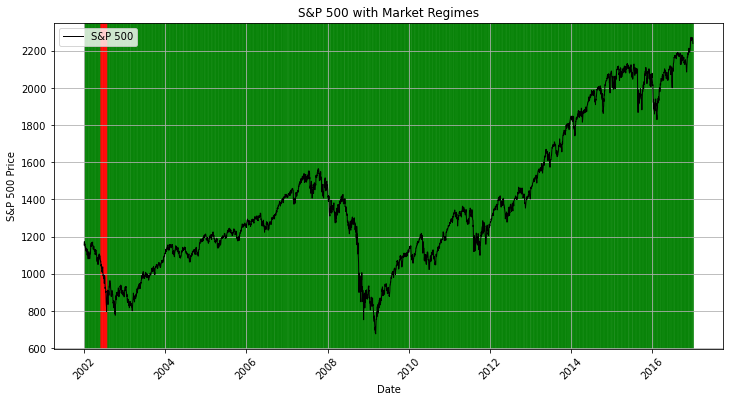

✅ Processing: 2002-07-01 to 2017-07-01
✅ Final chosen penalty: 5, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.5929410145894896}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:57:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


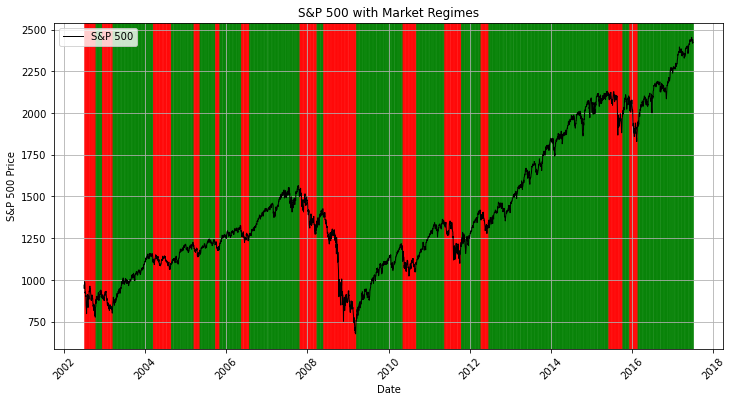

✅ Processing: 2003-01-01 to 2018-01-01
✅ Final chosen penalty: 3, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 35, 'learning_rate': 0.05, 'strat_returns': 0.5241545862565316}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:57:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


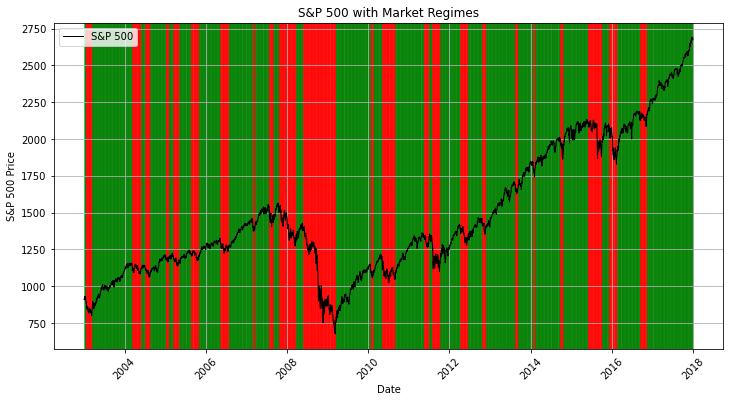

✅ Processing: 2003-07-01 to 2018-07-01
✅ Final chosen penalty: 6, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 15, 'learning_rate': 0.05, 'strat_returns': 0.34985581947486755}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:58:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


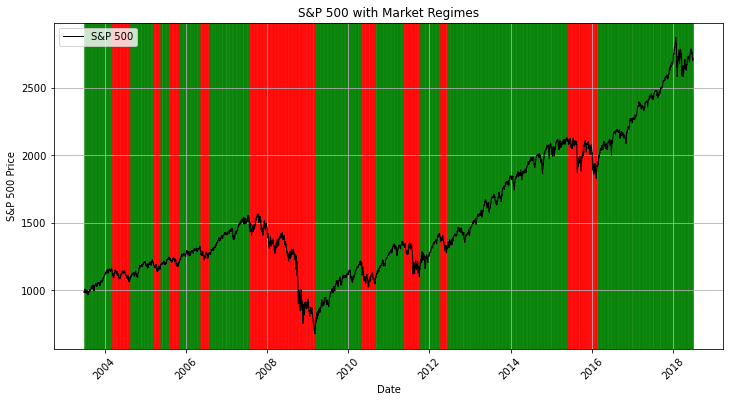

✅ Processing: 2004-01-01 to 2019-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.17281259638192048}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:58:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


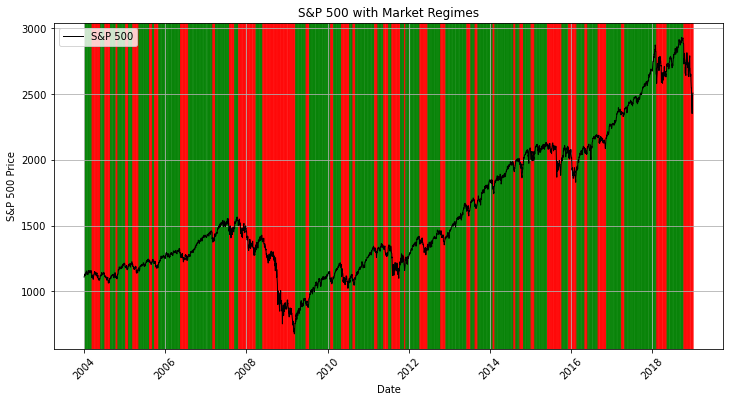

✅ Processing: 2004-07-01 to 2019-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.3636355309110211}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:58:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


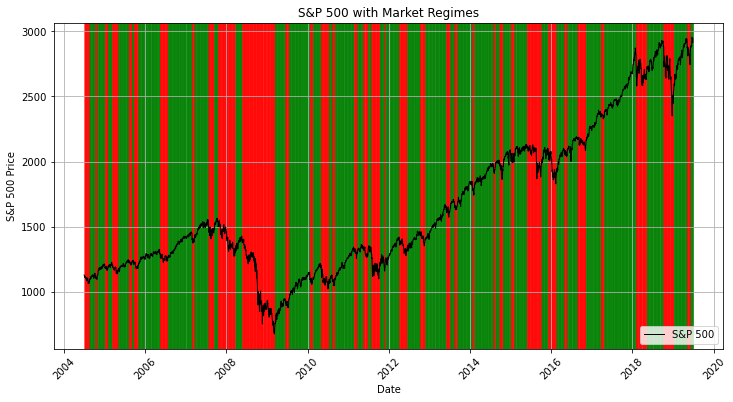

✅ Processing: 2005-01-01 to 2020-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.5288047102767932}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:59:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


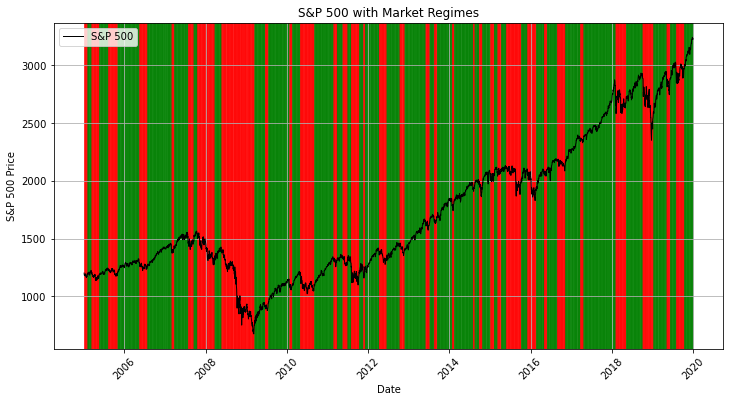

✅ Processing: 2005-07-01 to 2020-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 35, 'learning_rate': 0.05, 'strat_returns': 0.8069876755993342}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:59:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


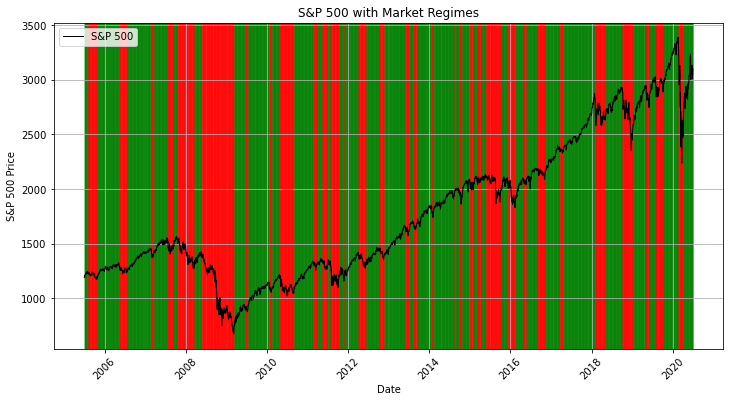

✅ Processing: 2006-01-01 to 2021-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.8587693098180191}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


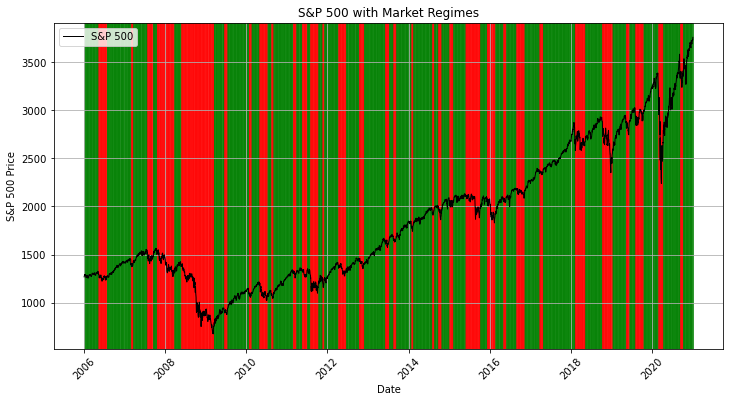

✅ Processing: 2006-07-01 to 2021-07-01
✅ Final chosen penalty: 3, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.25000000000000006, 'strat_returns': 1.075158447136316}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:00:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


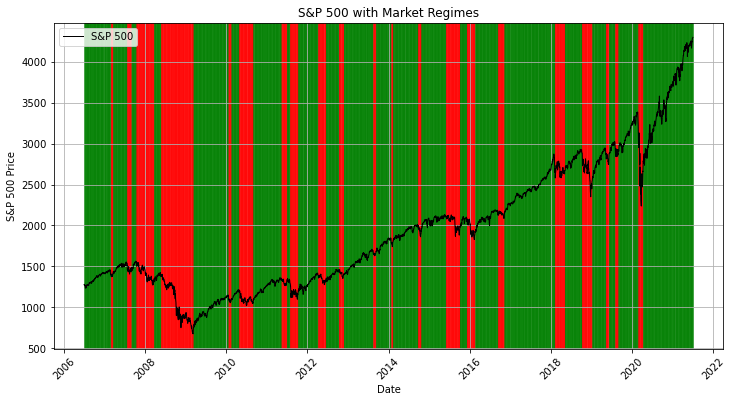

✅ Processing: 2007-01-01 to 2022-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.7736225295107282}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:00:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


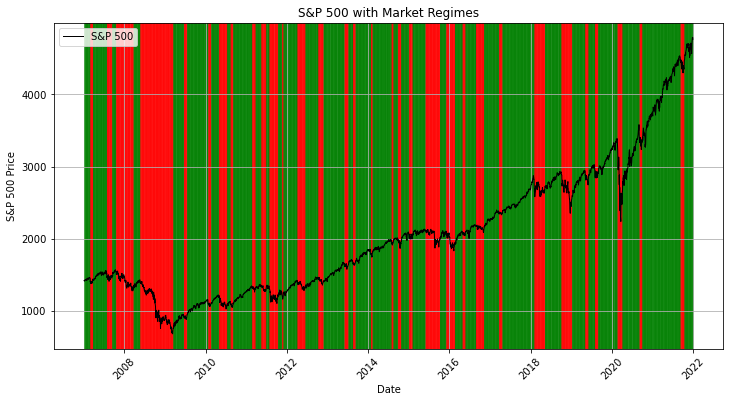

✅ Processing: 2007-07-01 to 2022-07-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 15, 'learning_rate': 0.05, 'strat_returns': 0.6131875191921643}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:00:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


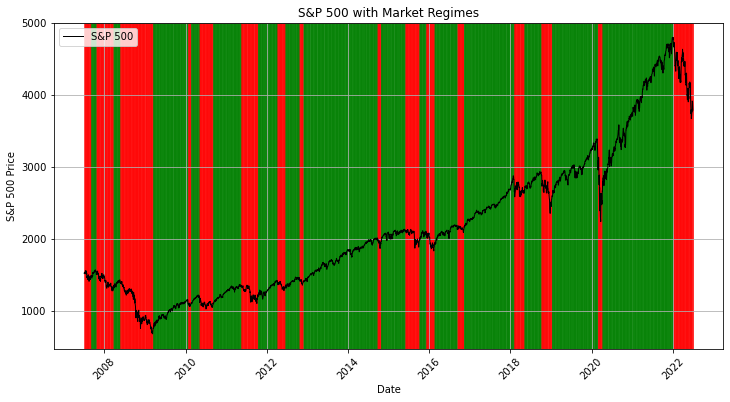

✅ Processing: 2008-01-01 to 2023-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.5071404361007386}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:01:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


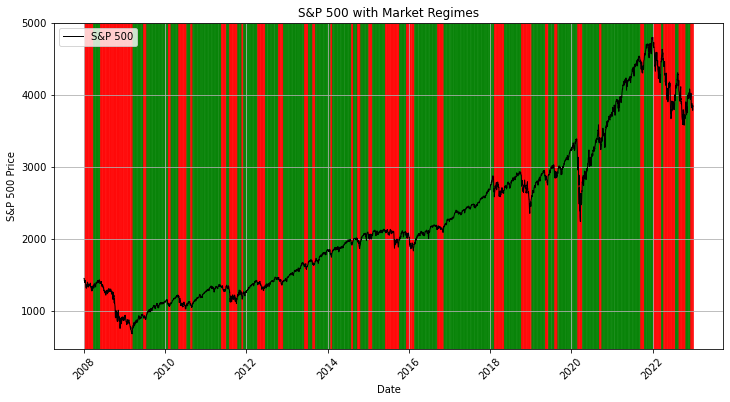

✅ Processing: 2008-07-01 to 2023-07-01
✅ Final chosen penalty: 8, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.0}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:01:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


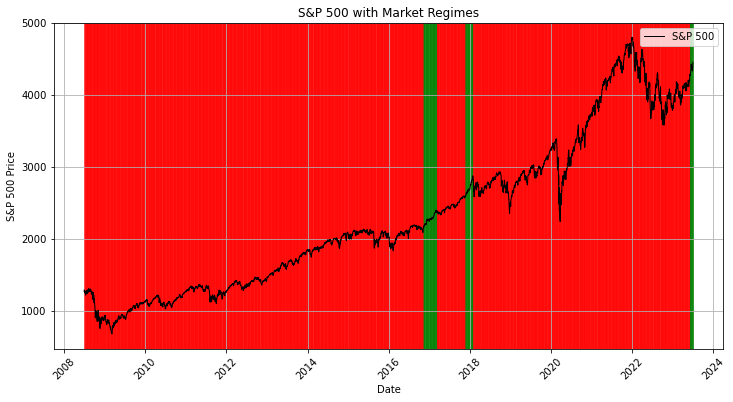

✅ Processing: 2009-01-01 to 2024-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.46807269552849573}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:02:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


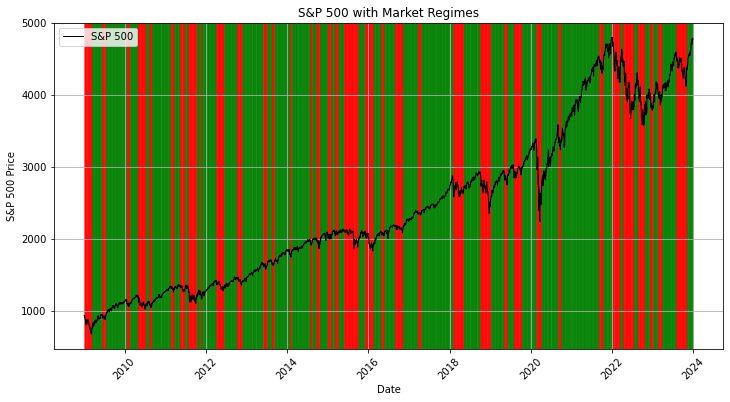

✅ Processing: 2009-07-01 to 2024-07-01
✅ Final chosen penalty: 3, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 35, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.3480376507361347}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:02:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


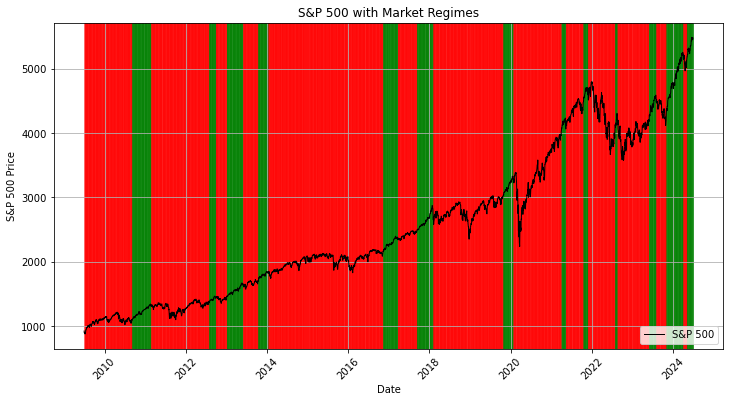

✅ Processing: 2010-01-01 to 2025-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.0932238105922698}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:02:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


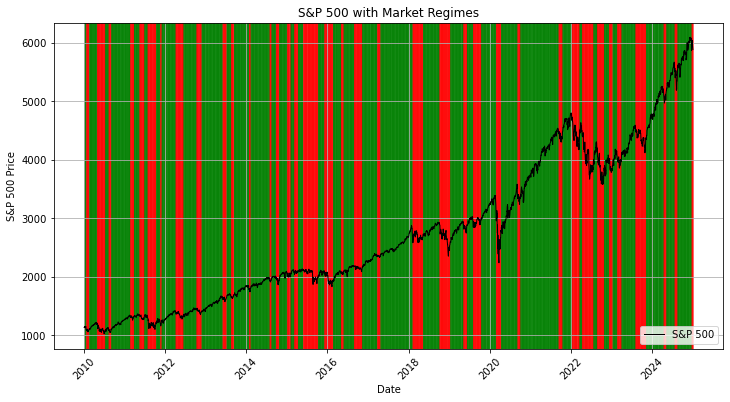

✅ Regime Forecasting Completed!


In [6]:
# 设定参数
prediction_start = "2008-01-02"
initial_train_end = (pd.to_datetime(prediction_start) - pd.DateOffset(days=1)).strftime("%Y-%m-%d")
initial_train_start = (pd.to_datetime(initial_train_end) - pd.DateOffset(years=15)).strftime("%Y-%m-%d")
prediction_end = "2025-06-10"
update_interval_months = 6
validation_years = 4

# 开始滚动训练
current_train_start = pd.to_datetime(initial_train_start)
current_train_end = pd.to_datetime(initial_train_end)
current_prediction_end = pd.to_datetime(prediction_end)
update_interval = pd.DateOffset(months=update_interval_months)

while current_train_end < current_prediction_end:
    print(f"✅ Processing: {current_train_start.date()} to {current_train_end.date()}")
    next_update_date = current_train_end + update_interval

    # 1️⃣ 训练 Jump Model (Penalized K-Means)
    df_result = train_kmeans(df_result, ASSET, feature_columns, feature_columns_xgb, 
                             current_train_start, current_train_end, validation_years=validation_years, 
                             pca=False, n_comp_kmeans = 5, next_update_date=next_update_date, 
                             pca_xgb=False, n_comp_xgb=10)
#     df_result = train_xgb(df_result, ASSET, feature_columns_xgb, current_train_start, current_train_end, validation_years=4, next_update_date=next_update_date)
    plot_market_regime(df_result, ASSET, current_train_start, current_train_end)
    
    # 滚动窗口更新
    current_train_start += update_interval
    
    current_train_end += update_interval

print("✅ Regime Forecasting Completed!")

# 回测

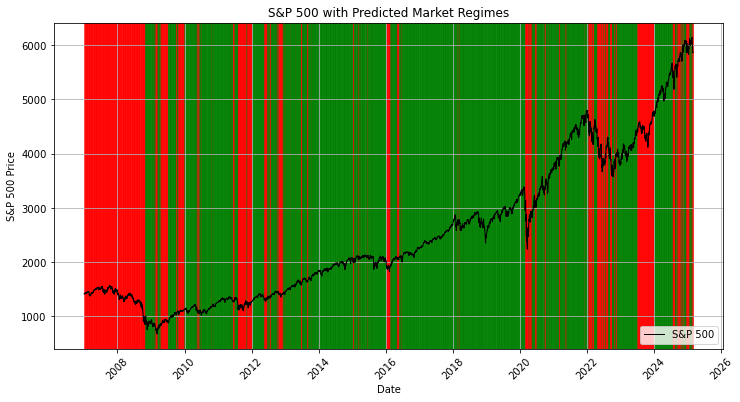

In [7]:
# 过滤数据
start = prediction_start #'2007-01-02'
df_view = df_result[df_result['DateTime'].dt.year >= 2007].reset_index()

# 创建图形
fig, ax = plt.subplots(figsize=(12, 6))

# 画出 S&P 500 走势
ax.plot(df_view['DateTime'].values, df_view[f"{ASSET}"].values, label="S&P 500", color="black", linewidth=1)

# 画出市场状态
for i in range(len(df_view) - 1):
    color = "green" if df_view["Regime_Forecast"].iloc[i] == 1 else "red"
    ax.axvspan(df_view['DateTime'].iloc[i], df_view['DateTime'].iloc[i + 1], color=color, alpha=0.3)

# 添加标题和标签
ax.set_title("S&P 500 with Predicted Market Regimes")
ax.set_xlabel("Date")
ax.set_ylabel("S&P 500 Price")
ax.legend()

# 旋转日期标签
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [8]:
# 由于代码执行状态已重置，df_view 需要重新加载
# 请上传包含 df_view 的数据文件，或者提供相关代码以重新生成 df_view
 
# 获取今天的日期
today = pd.Timestamp.today()

# 计算过去一个月的开始日期
one_month_ago = today - pd.DateOffset(months=1)

# 筛选过去一个月的数据
df_past_month = df_view[(df_view["DateTime"] >= one_month_ago) & (df_view["DateTime"] < today)].copy()

# 确保 Market_Regime_Num 这一列存在，并映射到文本标签
if "Market_Regime_Num" in df_past_month.columns:
    df_past_month["Market_Regime_Label"] = df_past_month["Regime_Forecast"].map({1: "Bullish", 0: "Bearish"})

# 只选择需要显示的列
columns_to_display = ["DateTime", f"{ASSET}", "Market_Regime_Label"]
df_past_month = df_past_month[columns_to_display]

df_past_month


,DateTime,SPX,Market_Regime_Label


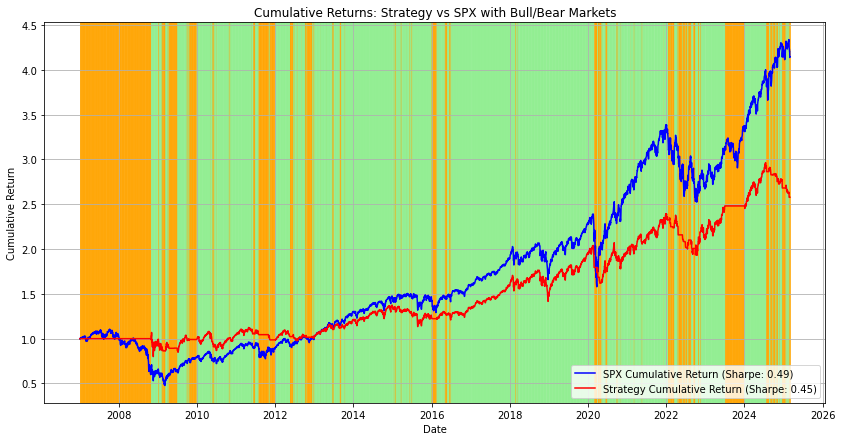

In [9]:
# 复制数据框并确保 DateTime 格式正确
df_test = df_view.copy()
df_test["DateTime"] = pd.to_datetime(df_test["DateTime"])

# 设定市场状态的基础仓位
df_test["Position"] = np.where(df_test["Regime_Forecast"] == 1, 1, 0)

# 避免未来函数问题（仓位延迟一天执行）
df_test["Position"] = df_test["Position"].shift(1)

# 计算每日收益
df_test[f"{ASSET}_Return"] = df_test[f"{ASSET}"].pct_change()
df_test["Strategy_Return"] = df_test[f"{ASSET}_Return"] * df_test["Position"]

# 计算累积收益
df_test[f"{ASSET}_Cumulative"] = (1 + df_test[f"{ASSET}_Return"]).cumprod()
df_test["Strategy_Cumulative"] = (1 + df_test["Strategy_Return"]).cumprod()

# 计算夏普比率
def sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252)

strategy_sharpe = sharpe_ratio(df_test["Strategy_Return"].dropna())
spx_sharpe = sharpe_ratio(df_test[f"{ASSET}_Return"].dropna())

# 绘制回测结果
plt.figure(figsize=(14, 7))
plt.plot(df_test["DateTime"].values, df_test[f"{ASSET}_Cumulative"].values, label=f"{ASSET} Cumulative Return (Sharpe: {spx_sharpe:.2f})", color="blue")
plt.plot(df_test["DateTime"].values, df_test["Strategy_Cumulative"].values, label=f"Strategy Cumulative Return (Sharpe: {strategy_sharpe:.2f})", color="red")

# 画出牛市（绿色）和熊市（粉色）背景
for i in range(1, len(df_test)):
    if df_test["Regime_Forecast"].iloc[i] == 1:  # 牛市
        plt.axvspan(df_test["DateTime"].iloc[i-1], df_test["DateTime"].iloc[i], color="lightgreen", alpha=0.3)
    else:  # 熊市
        plt.axvspan(df_test["DateTime"].iloc[i-1], df_test["DateTime"].iloc[i], color="orange", alpha=0.3)

plt.title(f"Cumulative Returns: Strategy vs {ASSET} with Bull/Bear Markets")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


# 指标

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew


# df_cleaned = df_test[[f"{ASSET}_Return", 'Strategy_Return', f"{ASSET}_Cumulative", 'Strategy_Cumulative']].dropna()


# 计算指标函数
def sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252) if np.std(returns) != 0 else np.nan

def max_drawdown(cumulative_returns):
    peak = np.maximum.accumulate(cumulative_returns.dropna())
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def sortino_ratio(returns):
    downside_returns = returns[returns < 0]
    downside_std = np.std(downside_returns)
    return np.mean(returns) / downside_std * np.sqrt(252) if downside_std != 0 else np.nan

def information_coefficient(predictions, actual_returns):
    return np.corrcoef(predictions, actual_returns)[0, 1] if len(predictions) > 1 else np.nan

def rank_information_coefficient(predictions, actual_returns):
    return np.corrcoef(pd.Series(predictions).rank(), pd.Series(actual_returns).rank())[0, 1] if len(predictions) > 1 else np.nan

def skewness(returns):
    return skew(returns, nan_policy='omit')


# # 复制数据并清理 NaN
# df_cleaned = df_test.dropna()

# # 计算指标
# # 计算指标
# metrics = {
#     "Metric": ["Mean Return", "Standard Deviation", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown", "Skewness", "IC", "Rank IC"],
#     "SPX": [
#         np.mean(df_cleaned[f"{ASSET}_Return"]),
#         np.std(df_cleaned[f"{ASSET}_Return"]),
#         sharpe_ratio(df_cleaned[f"{ASSET}_Return"]),
#         sortino_ratio(df_cleaned[f"{ASSET}_Return"]),
#         max_drawdown(df_cleaned[f"{ASSET}_Cumulative"]),
#         skewness(df_cleaned[f"{ASSET}_Return"]),
#         '-',  # SPX 无法计算 IC
#         '-'   # SPX 无法计算 Rank IC
#     ],
#     "Strategy": [
#         np.mean(df_cleaned["Strategy_Return"]),
#         np.std(df_cleaned["Strategy_Return"]),
#         sharpe_ratio(df_cleaned["Strategy_Return"]),
#         sortino_ratio(df_cleaned["Strategy_Return"]),
#         max_drawdown(df_cleaned["Strategy_Cumulative"]),
#         skewness(df_cleaned["Strategy_Return"]),
#         information_coefficient(df_cleaned["Position"], df_cleaned[f"{ASSET}_Return"]),
#         rank_information_coefficient(df_cleaned["Position"], df_cleaned[f"{ASSET}_Return"])
#     ]
# }

# # 转换为 DataFrame 并展示
# metrics_df = pd.DataFrame(metrics)
# metrics_df


In [ ]:
# 计算滚动 Sharpe Ratio
def rolling_sharpe_ratio(returns, window=252, step=21):
    """
    计算滚动 Sharpe Ratio，每次移动 `step` 天，窗口大小 `window`
    """
    sharpe_ratios = []
    dates = []
    
    for start in range(0, len(returns) - window + 1, step):
        end = start + window
        window_returns = returns[start:end]
        if window_returns.std() != 0:  # 避免除零错误
            sharpe = np.mean(window_returns) / np.std(window_returns) * np.sqrt(252)
        else:
            sharpe = np.nan
        sharpe_ratios.append(sharpe)
        dates.append(df_test["DateTime"].iloc[end-1])  # 记录窗口结束日期

    return pd.DataFrame({"Date": dates, "Sharpe Ratio": sharpe_ratios})

# 计算 SPX 和策略的滚动 Sharpe Ratio
spx_sharpe_df = rolling_sharpe_ratio(df_test["SPX_Return"].dropna().values)
strategy_sharpe_df = rolling_sharpe_ratio(df_test["Strategy_Return"].dropna().values)

# 合并数据
rolling_sharpe_df = pd.merge(spx_sharpe_df, strategy_sharpe_df, on="Date", suffixes=("_SPX", "_Strategy"))

plt.figure(figsize=(12, 6))
plt.plot(rolling_sharpe_df["Date"].values, rolling_sharpe_df["Sharpe Ratio_SPX"].values, label="SPX Rolling Sharpe", color="blue")
plt.plot(rolling_sharpe_df["Date"].values, rolling_sharpe_df["Sharpe Ratio_Strategy"].values, label="Strategy Rolling Sharpe", color="red")

plt.title("Rolling 5-Year Sharpe Ratio (Step = 1 Year)")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_test['SPX_Position'] = df_test['Position']
df_test[['DateTime', 'SPX_Position', 'SPX_Return']].to_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/SPX/SPX_positions.xlsx')

In [ ]:
import yfinance as yf
import pandas as pd

# Step 1: Download GLD data from Yahoo Finance
df_test = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/SPX/SPX_positions.xlsx')
gld = pd.read_excel('/Users/charlesxiong/Desktop/IBKR_algo/ode/data/GLD.xlsx')

# Step 2: Prepare df_test DataFrame
# Ensure df_test is already loaded with 'DateTime', 'SPX_Position', and 'SPX_Return' columns

# Step 3: Merge GLD data with df_test
df_merged = pd.merge(df_test[['DateTime', 'SPX_Position', 'SPX_Return']], gld[['DateTime', 'GLD_Close']], how='left')

# Step 4: Calculate Combined Returns
# Calculate GLD daily returns
df_merged['GLD_Return'] = df_merged['GLD_Close'].pct_change()

# Determine portfolio returns based on SPX_Position
df_merged['Portfolio_Return'] = df_merged.apply(
    lambda row: row['SPX_Return'] if row['SPX_Position'] == 1 else row['GLD_Return'],
    axis=1
)

# Display the resulting DataFrame
df_merged[['SPX_Position', 'SPX_Return', 'GLD_Return', 'Portfolio_Return']]

# Step 5: 计算累计收益（Cumulative Returns）
df_merged['SPX_CumRet'] = (1 + df_merged['SPX_Return']).cumprod()
df_merged['Portf_CumRet'] = (1 + df_merged['Portfolio_Return']).cumprod()

# Step 6: 画图
plt.figure(figsize=(12, 6))
plt.plot(df_merged['DateTime'].values, df_merged['SPX_CumRet'].values, label='S&P 500 Strategy', color='blue')
plt.plot(df_merged['DateTime'].values, df_merged['Portf_CumRet'].values, label='SPX/GLD Combined Strategy', color='orange')
plt.title('Cumulative Return: S&P 500 vs SPX/GLD Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 找出 SPX_Position 切换的日期（从1变0或从0变1）
df_merged['Position_Change'] = df_merged['SPX_Position'].ne(df_merged['SPX_Position'].shift())
switch_dates = df_merged.loc[df_merged['Position_Change'], 'DateTime']

# 画图
plt.figure(figsize=(14, 7))
plt.plot(df_merged['DateTime'].values, df_merged['SPX_CumRet'].values, label='S&P 500 Strategy', color='blue')
plt.plot(df_merged['DateTime'].values, df_merged['Portf_CumRet'].values, label='SPX/GLD Combined Strategy', color='orange')

# 添加 regime 切换点竖线
for switch_date in switch_dates:
    plt.axvline(switch_date, color='grey', alpha=0.4)

plt.title('Cumulative Return: S&P 500 vs SPX/GLD Strategy with Regime Switches')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_merged["0/1 Strategy_Return"] = df_merged['SPX_Return'] * df_merged["SPX_Position"]
df_merged["0/1 Strategy_Cumulative"] = (1 + df_merged["0/1 Strategy_Return"]).cumprod()
df_merged = df_merged.dropna(subset = ['SPX_Return', 'SPX_CumRet', 'Portfolio_Return', 'Portf_CumRet'])

In [ ]:
metrics = {
    "Metric": ["Annual Return", "Annual Standard Deviation", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown", "Skewness", "IC"],
    "SPX": [
        (1 + np.mean(df_merged['SPX_Return']))**252 - 1,
        np.std(df_merged['SPX_Return']) * np.sqrt(252),
        sharpe_ratio(df_merged['SPX_Return']),
        sortino_ratio(df_merged['SPX_Return']),
        max_drawdown(df_merged['SPX_CumRet']),
        skewness(df_merged['SPX_Return']),
        '-',  # SPX 无法计算 IC
#         '-'   # SPX 无法计算 Rank IC
    ],
    "SPX/GLD Strategy": [
        (1 + np.mean(df_merged['Portfolio_Return']))**252 - 1,
        np.std(df_merged['Portfolio_Return']) * np.sqrt(252),
        sharpe_ratio(df_merged["Portfolio_Return"]),
        sortino_ratio(df_merged["Portfolio_Return"]),
        max_drawdown(df_merged["Portf_CumRet"]),
        skewness(df_merged["Portfolio_Return"]),
        '-',  # SPX 无法计算 IC
#         '-'   # SPX 无法计算 Rank IC
    ],
    "SPX 0/1 Strategy": [
       (1 + np.mean(df_merged['0/1 Strategy_Return']))**252 - 1,
        np.std(df_merged['0/1 Strategy_Return']) * np.sqrt(252),
        sharpe_ratio(df_merged["0/1 Strategy_Return"]),
        sortino_ratio(df_merged["0/1 Strategy_Return"]),
        max_drawdown(df_merged["0/1 Strategy_Cumulative"]),
        skewness(df_merged["0/1 Strategy_Return"]),
        information_coefficient(df_merged["SPX_Position"], df_merged['SPX_Return']),
#         rank_information_coefficient(df_merged["SPX_Position"], df_merged['SPX_Return'])
    ]
}

# 转换为 DataFrame 并展示
metrics_df = pd.DataFrame(metrics)
metrics_df
